# Imports

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import google.colab
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats
from sklearn.feature_selection import f_classif

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
music_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/Music/light_spotify_dataset.csv")

In [60]:
music_df.groupby('emotion').size()

,0
emotion,
True,7
anger,47192
angry,1
fear,11960
joy,91532
love,12802
pink,1
sadness,71160
surprise,2332


In [61]:
# prompt: find me the rows where the 'emotion' is: 'thirst', 'pink', ' True;

thirst_rows = music_df[music_df['emotion'] == 'thirst']
pink_rows = music_df[music_df['emotion'] == 'pink']
true_rows = music_df[music_df['emotion'] == 'True']

# Combine the results if needed
combined_rows = pd.concat([thirst_rows, pink_rows, true_rows])

combined_rows


,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
164838,Jason Derulo,Swalla After Dark Remix,thirst,0.833514,pop,2017,G# min,79,-5.92,Yes,28,67,35,54,39,40,42,0
115630,Pink Floyd,Vegetable Man,pink,0.833514,progressive,2016,B Maj,126,-11.32,No,21,64,39,36,4,86,1,0
122462,Nusrat Fateh Ali Khan,Dam Mast Qalandar Mast Mast,True,0.833514,"Unknown,Unknown,Unknown",1992,D# min,153,-13.00,No,26,59,44,72,4,29,5,0
147115,Leon Bridges,Twistin And Groovin,True,0.833514,soul,2015,C# min,118,-6.73,No,47,52,68,51,3,12,38,0
150480,Kota Suzuki,Legacy,True,0.833514,"Unknown,Unknown,Unknown",2019,C Maj,115,-8.10,No,37,31,35,6,4,10,59,0
154228,Kendrick Lamar,Mortal Man,True,0.833514,rap,2015,A# min,87,-9.04,Yes,59,52,57,42,75,71,66,0
176230,Gravediggaz,360 Questions,True,0.833514,hip-hop,1995,G Maj,170,-8.66,Yes,39,72,71,58,28,21,37,0
187411,FEVER 333,Trigger,True,0.833514,metal,2018,C# Maj,112,-4.00,Yes,28,99,63,38,43,89,1,0
189650,Eluveitie,Epona,True,0.833514,metal,2017,D min,145,-6.56,No,52,95,50,47,9,38,0,4


In [62]:
# prompt: create a copy of the dataframe, then for it: remove the rows where the 'emotion' is: 'thirst', 'pink', ' True';

df = music_df.copy()
df = df[~df['emotion'].isin(['thirst', 'pink', 'True'])]


In [63]:
df.loc[df['emotion'] == 'angry', 'emotion'] = 'anger'

In [64]:
df.groupby('emotion').size()

,0
emotion,
anger,47193
fear,11960
joy,91532
love,12802
sadness,71160
surprise,2332


In [65]:
print(len(df))

236979


In [66]:
df.describe()

,variance,Release Date,Tempo,Loudness,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
count,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000,236979.000000
mean,0.658925,2008.472709,120.609603,-8.038653,40.003802,62.369041,59.127788,47.657071,11.747606,19.904418,26.156136,5.440242
std,0.320740,14.756303,28.966392,3.842254,18.770443,22.083439,17.069179,23.802009,12.442830,16.549985,29.047478,17.662833
min,-1.000000,1900.000000,33.000000,-46.770000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.833514,2002.000000,97.000000,-9.890000,27.000000,48.000000,48.000000,29.000000,4.000000,10.000000,2.000000,0.000000
50%,0.833514,2015.000000,120.000000,-7.190000,39.000000,64.000000,60.000000,47.000000,6.000000,13.000000,14.000000,0.000000
75%,0.833514,2019.000000,140.000000,-5.370000,52.000000,80.000000,72.000000,66.000000,16.000000,25.000000,44.000000,0.000000
max,1.000000,2024.000000,200.000000,3.740000,100.000000,100.000000,99.000000,99.000000,97.000000,100.000000,100.000000,100.000000


In [67]:
df.isnull().sum()

,0
artist,0
song,8
emotion,0
variance,0
Genre,0
Release Date,0
Key,0
Tempo,0
Loudness,0
Explicit,0


In [68]:
df.duplicated().sum()

np.int64(2)

In [69]:
print(len(df))

236979


In [70]:
df = df.drop_duplicates()

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
print(len(df))

236977


In [73]:
df['artist'].value_counts()


,count
artist,
Genius English Translations,1604
Lil Wayne,753
Juice WRLD,647
Chris Brown,589
Gucci Mane,522
...,...
Malaki,1
Malaika,1
Malachiae,1


In [74]:
df.shape

(236977, 18)

In [75]:
top_genres = df['Genre'].value_counts().nlargest(11).index
df['Genre']=df['Genre'].apply(lambda x: x if x in top_genres else 'other')


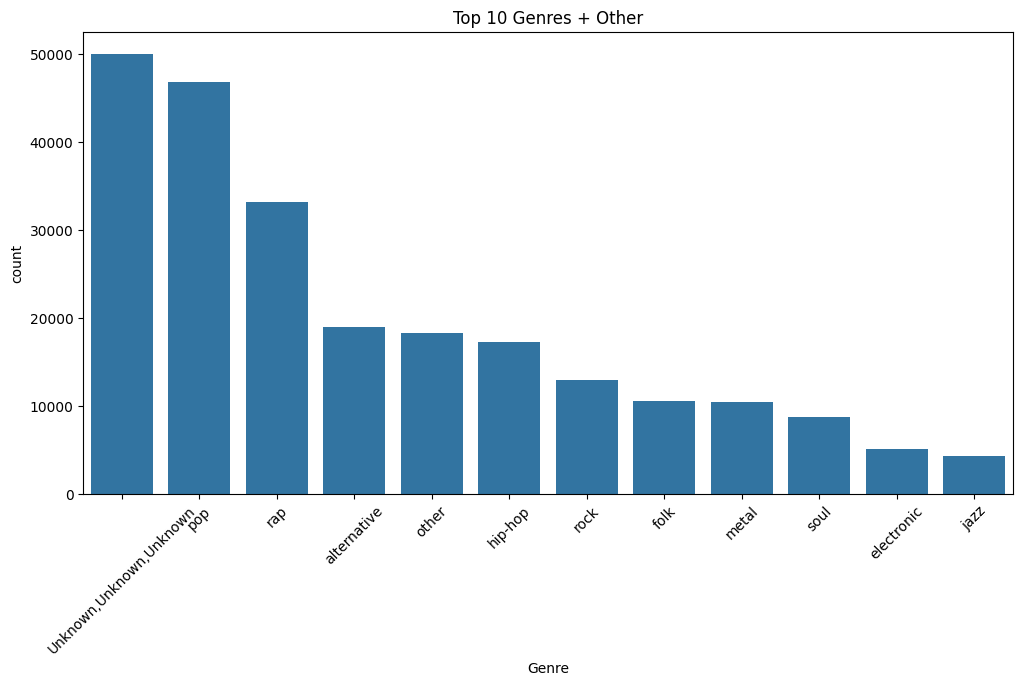

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

Genre
other          0.288117
pop            0.197834
rap            0.140111
alternative    0.080383
hip-hop        0.073070
rock           0.054672
folk           0.044814
metal          0.044262
soul           0.036881
electronic     0.021707
jazz           0.018149
Name: proportion, dtype: float64


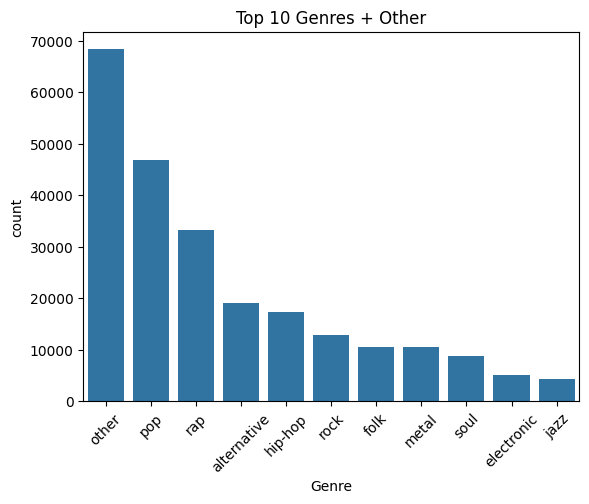

In [77]:
df['Genre']=df['Genre'].replace('Unknown,Unknown,Unknown','other')
print(df['Genre'].value_counts(normalize=True))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

In [78]:
df.groupby('emotion').size()

,0
emotion,
anger,47193
fear,11960
joy,91531
love,12802
sadness,71159
surprise,2332


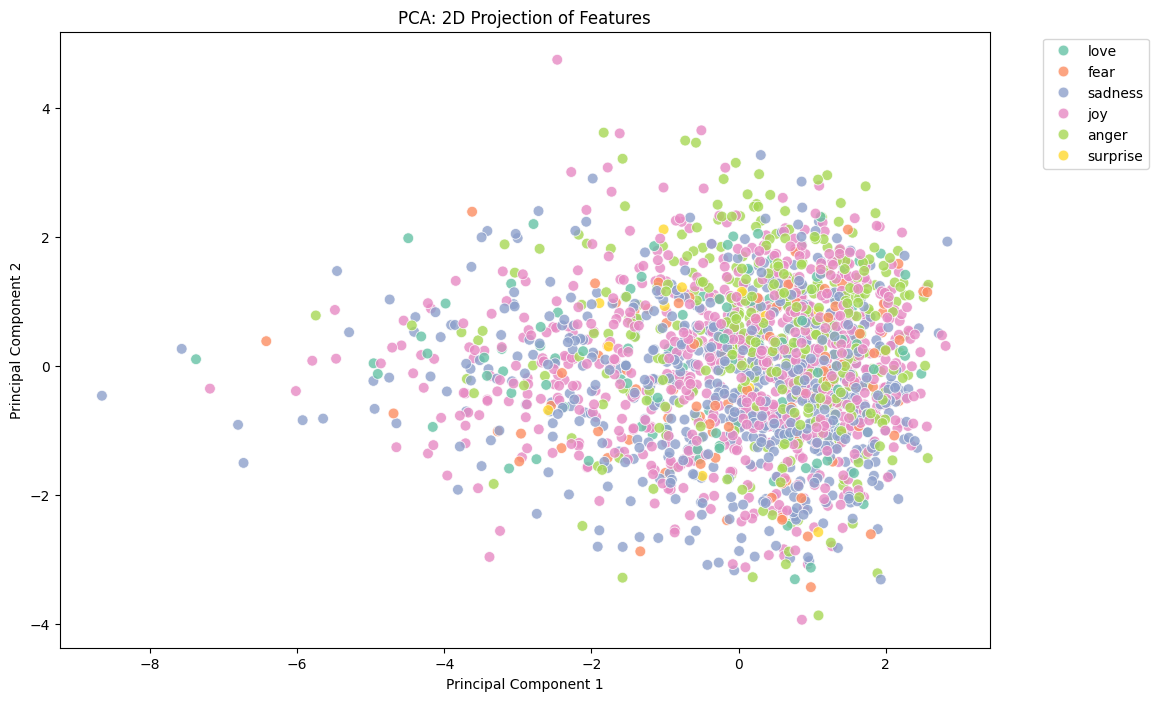

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_sampled = df.sample(n=2000, random_state=42)
target = df_sampled['emotion']
features = df_sampled.drop(['artist','song','emotion','Genre','Release Date','Explicit','Key'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("PCA: 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

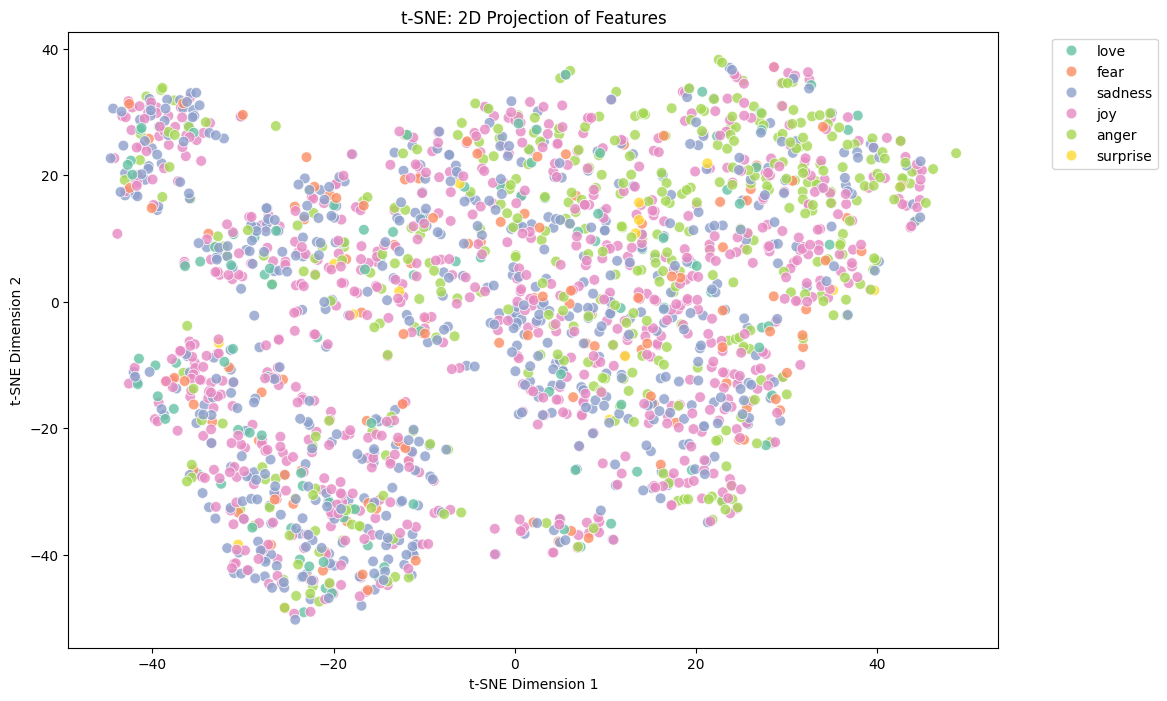

In [ ]:
from sklearn.manifold import TSNE
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target, palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE: 2D Projection of Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load the dataset
data = df.copy()

# Step 1: Drop the specified columns
columns_to_drop = ['artist','song','Genre','Release Date','Explicit','Key']
data = data.drop(columns=columns_to_drop)

# Step 3: Standardize all the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 4: Label encode the 'mood' column
label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['emotion'])

# Extract features and target
X = data.drop(columns=['emotion', 'mood_encoded'])
y = data['mood_encoded']

# Split data into training, evaluation, and testing sets (70-10-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGB Classifier": xgb.XGBClassifier(use_label_encoder=True, eval_metric="mlogloss", random_state=42),
    "SVM Linear": SVC(kernel="linear", random_state=42),
    "SVM Polynomial": SVC(kernel="poly", random_state=42),
    "SVM RBF": SVC(kernel="rbf", random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the evaluation set
    y_pred = model.predict(X_test)

    # Record the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

# After

# Taheli: now added the features were selected: from data science course rec 4 of PCA

In [ ]:
df.shape

(236979, 18)

In [ ]:
X = df.drop(['artist','song','emotion','Genre','Release Date','Explicit','Key'], axis=1).values
n, p = X.shape
print(f'n = {n}, p = {p}')

n = 236979, p = 11


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_s = scaler.fit_transform(X)

In [ ]:
# all columns means are zeros
X_s.mean(axis=0)

array([-4.37517231e-16,  2.40826371e-16, -4.59584987e-16, -8.05952795e-17,
       -8.32338154e-17, -1.59271624e-16, -9.41477595e-17,  1.05541437e-16,
        6.10461269e-17, -5.37301863e-17,  6.38045963e-17])

In [ ]:
# all columns stds are ones
X_s.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
eigvals, eigvecs = np.linalg.eig(X_s.T @ X_s)

print(eigvals)
print(eigvecs.shape)

[623645.90187965  38943.52053623 358698.56782443  95006.37219714
 129387.71460068 147588.95680418 289274.11113952 266795.84528962
 232202.06429712 221857.36146746 203368.58396397]
(11, 11)


In [ ]:
W = eigvecs
v1 = W[:, 0]
v1 = v1[:, np.newaxis]
print(v1)

[[ 0.13644917]
 [ 0.13738466]
 [ 0.51314891]
 [ 0.14310722]
 [ 0.52959186]
 [ 0.20583728]
 [ 0.25847052]
 [ 0.17593333]
 [ 0.09340874]
 [-0.47373658]
 [-0.15798097]]


In [ ]:
# print it nicer
remaining_columns = df.drop(['artist','song','emotion','Genre','Release Date','Explicit','Key'], axis=1).columns
pd.Series(v1.flatten(), index=remaining_columns).rename('First PC direction')

,First PC direction
variance,0.136449
Tempo,0.137385
Loudness,0.513149
Popularity,0.143107
Energy,0.529592
Danceability,0.205837
Positiveness,0.258471
Speechiness,0.175933
Liveness,0.093409
Acousticness,-0.473737


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['emotion_encoded'] = LabelEncoder().fit_transform(df['emotion'])

In [ ]:
from sklearn.feature_selection import f_classif

X = df[features]
y = df['emotion_encoded']  # from label encoding step

f_scores, p_values = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': features, 'F-score': f_scores, 'p-value': p_values})

In [ ]:
#anova_df = anova_df.sort_values(by='F-score')
anova_df

,Feature,F-score,p-value
0,Tempo,33.463543,2.803383e-34
1,Loudness,304.203887,0.000000e+00
2,Popularity,14.989938,9.582827e-15
3,Energy,332.982776,0.000000e+00
4,Danceability,1385.717649,0.000000e+00
5,Positiveness,358.931744,0.000000e+00
6,Speechiness,2426.120897,0.000000e+00
7,Liveness,49.440308,2.332542e-51
8,Acousticness,506.899455,0.000000e+00
9,Instrumentalness,55.259515,1.344412e-57


In [ ]:
df.head()

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,emotion_encoded
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0,2
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0,3
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2,4
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,2
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0,2


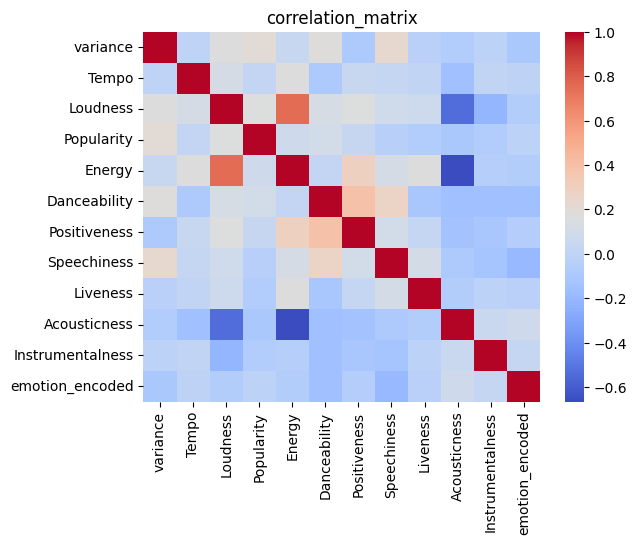

In [ ]:
def analyze_data(df):
    pd.set_option('display.max_columns', None)
    # Select only the numeric features
    numeric_features = df.drop(['artist','song','Genre','Release Date','Explicit','Key'], axis=1).select_dtypes(include=['number'])
    # Calculate correlation on numeric features only
    correlation_matrix = numeric_features.corr()

    plt.figure()
    sns.heatmap(correlation_matrix, cmap='coolwarm')
    plt.title('correlation_matrix')
    plt.show()

analyze_data(df)

In [ ]:
from sklearn.feature_selection import f_classif

X = df[[
    'Tempo', 'Loudness', 'Popularity', 'Energy', 'Danceability',
    'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness'
]]
y = df['emotion_encoded']

f_scores, p_values = f_classif(X, y)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values(by='F-score', ascending=False)

print(anova_df)


            Feature      F-score       p-value
6       Speechiness  2426.120897  0.000000e+00
4      Danceability  1385.717649  0.000000e+00
8      Acousticness   506.899455  0.000000e+00
5      Positiveness   358.931744  0.000000e+00
3            Energy   332.982776  0.000000e+00
1          Loudness   304.203887  0.000000e+00
9  Instrumentalness    55.259515  1.344412e-57
7          Liveness    49.440308  2.332542e-51
0             Tempo    33.463543  2.803383e-34
2        Popularity    14.989938  9.582827e-15


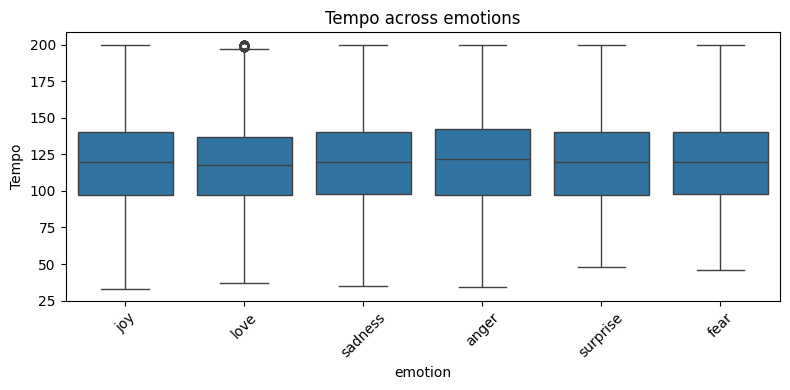

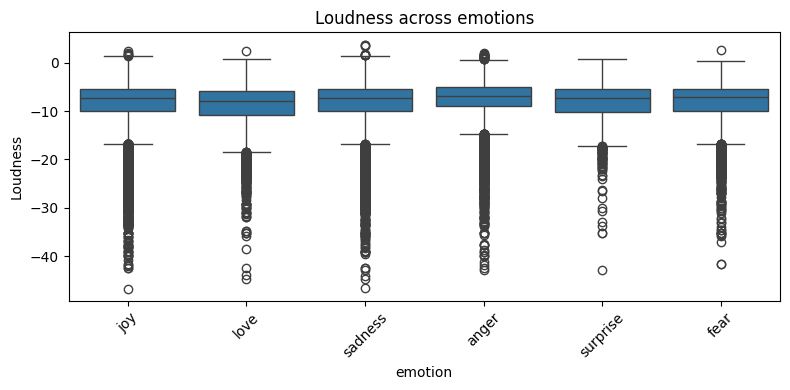

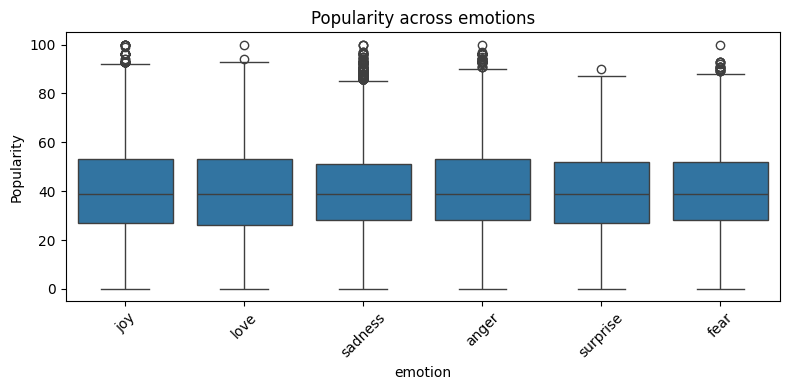

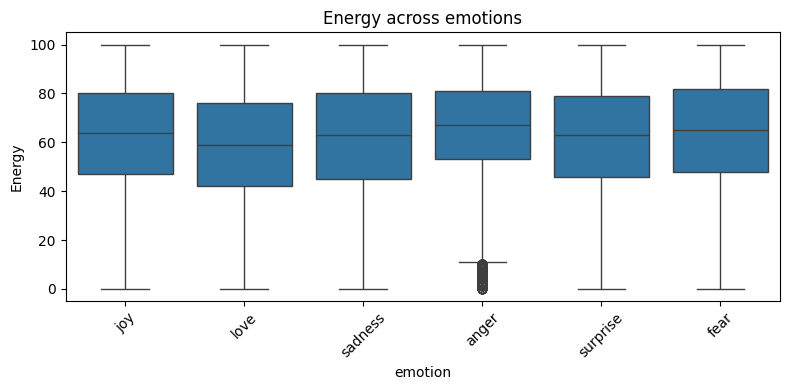

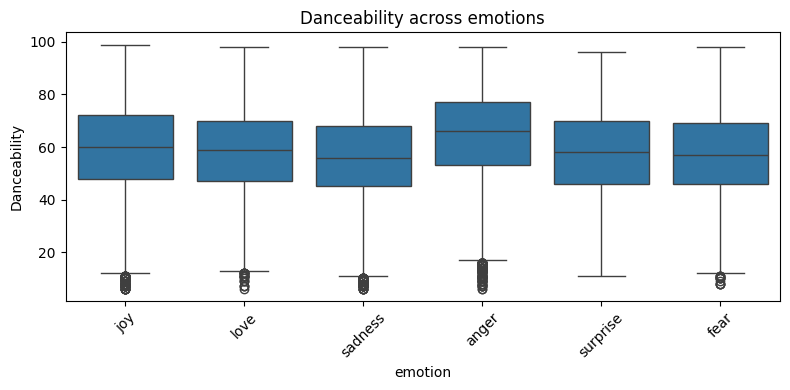

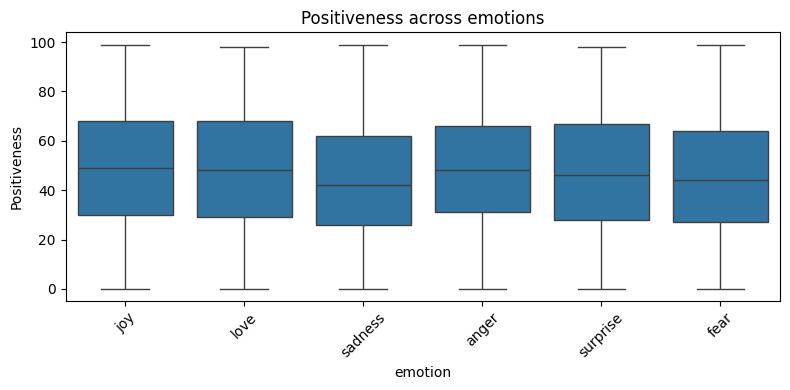

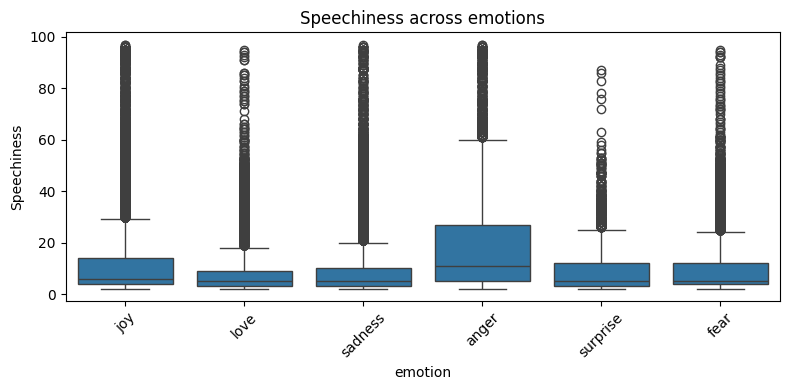

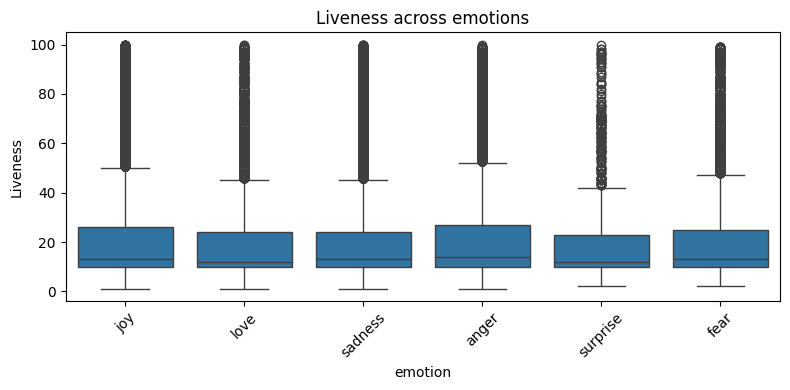

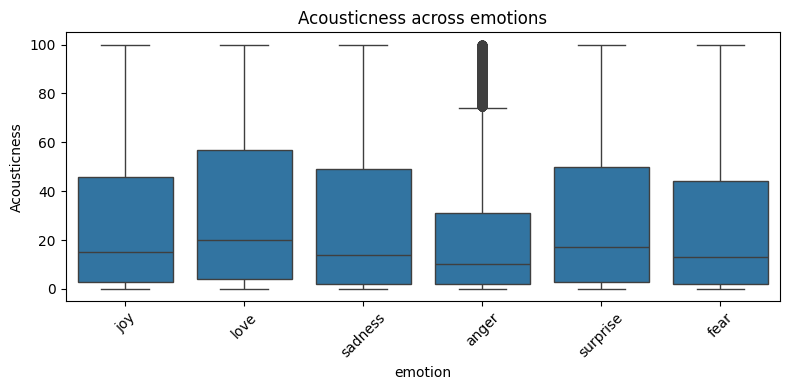

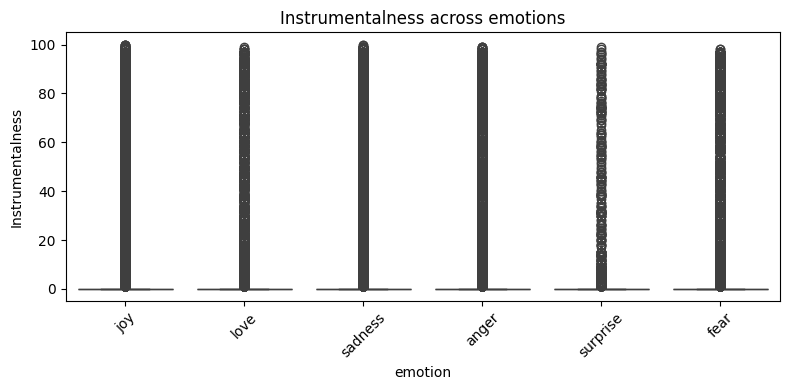

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Tempo', 'Loudness', 'Popularity', 'Energy', 'Danceability',
            'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='emotion', y=feature, data=df)
    plt.title(f'{feature} across emotions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Tempo', 'Loudness', 'Popularity', 'Energy', 'Danceability',
            'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness']

X = df[features]

# Scale the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

# Let's assume we want around 5 clusters (you can optimize later)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster label to your dataframe
df['cluster'] = clusters


In [ ]:
# Cross-tabulation: cluster vs emotion
cluster_emotion_table = pd.crosstab(df['cluster'], df['emotion'])

# Instead of using the potentially missing 'ace_tools', display using pandas:
print("Cluster vs Emotion Table:")
display(cluster_emotion_table)

Cluster vs Emotion Table:


emotion,anger,fear,joy,love,sadness,surprise
cluster,,,,,,
0,5218,2531,19040,3653,17141,551
1,14868,3577,31737,4477,20566,750
2,14724,1593,14095,1344,7589,308
3,2166,736,4640,671,4358,129
4,10217,3523,22020,2657,21506,594


In [ ]:
from sklearn.preprocessing import StandardScaler

# Your numerical features
features = ['Tempo', 'Loudness', 'Popularity', 'Energy', 'Danceability',
            'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness']

X = df[features]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

# Number of clusters? You can guess first (say, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# How many of each emotion in each cluster
cluster_emotion_table = pd.crosstab(df['cluster'], df['emotion'])


In [ ]:
# Average feature values for each cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)

# Instead of using the potentially missing 'ace_tools', display using pandas:
print("Cluster Centers (Feature Averages):")
display(cluster_centers)

Cluster Centers (Feature Averages):


,Tempo,Loudness,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,112.330426,-11.998581,35.447068,33.537500,50.655991,34.091138,5.371737,16.660643,65.302241,2.041477
1,115.171442,-6.919244,47.129288,67.825298,70.037186,62.391572,7.826901,15.474106,16.965851,1.276953
2,120.088131,-7.524477,36.240067,64.948521,70.108060,52.765339,34.578216,22.967339,21.778499,0.396600
3,121.293923,-11.011943,34.850126,57.844695,50.053448,37.695372,6.286918,18.323992,31.310847,73.757084
4,134.243066,-6.005720,38.213807,77.724550,46.863830,38.667968,7.956567,26.388713,8.330296,2.333289


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Cluster on reduced dimensions
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)


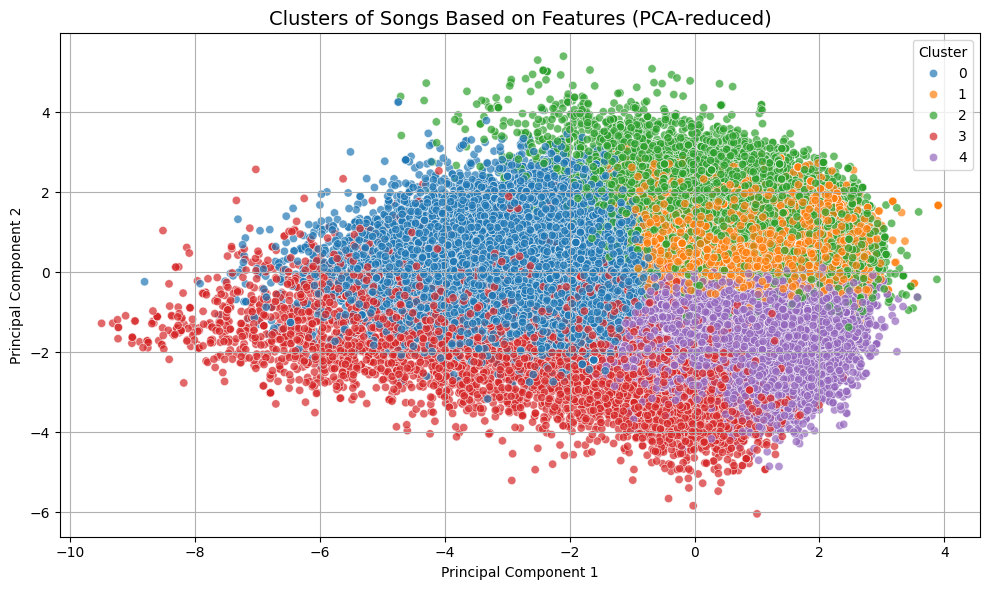

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce dimensions for visualization
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_scaled)

# Add PCA components and cluster to the dataframe for plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', alpha=0.7)
plt.title('Clusters of Songs Based on Features (PCA-reduced)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


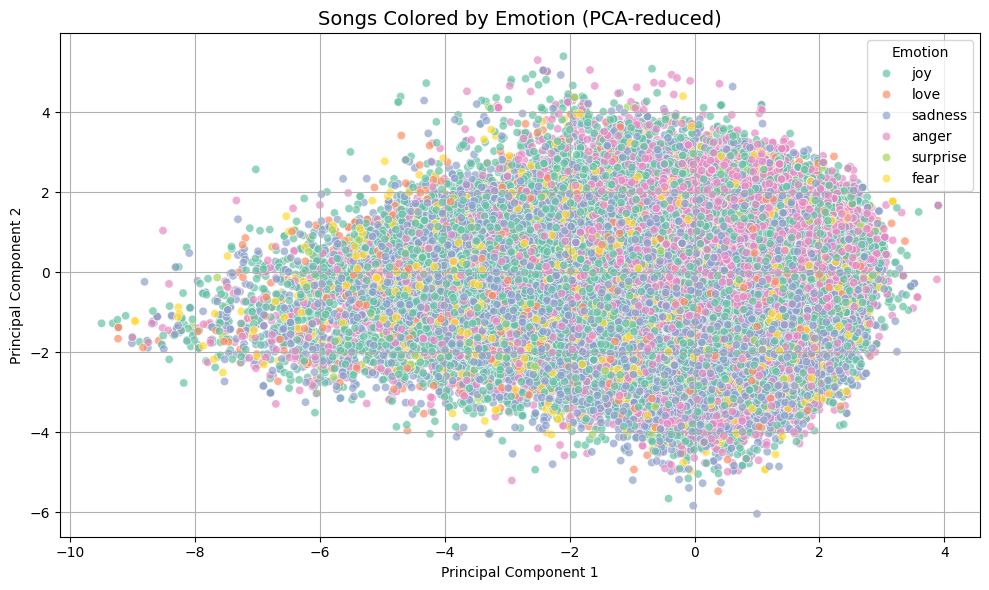

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='emotion', palette='Set2', alpha=0.7)
plt.title('Songs Colored by Emotion (PCA-reduced)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Emotion')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Cluster-emotion distribution
cluster_emotion_ct = pd.crosstab(df['cluster'], df['emotion'])

# Instead of using the potentially missing 'ace_tools', display using pandas:
print("Cluster vs Emotion Confusion Table:")
display(cluster_emotion_ct)

Cluster vs Emotion Confusion Table:


emotion,anger,fear,joy,love,sadness,surprise
cluster,,,,,,
0,2861,1588,11343,2347,10451,335
1,16941,2369,22467,2748,11708,457
2,5473,2156,12530,1643,13779,349
3,13003,3294,24423,2838,18456,599
4,8915,2553,20769,3226,16766,592


In [ ]:
def purity_score(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    import numpy as np
    # Compute contingency matrix (confusion matrix)
    contingency_matrix = pd.crosstab(y_pred, y_true).values
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

from sklearn.preprocessing import LabelEncoder

# Encode emotion labels
le = LabelEncoder()
y_true = le.fit_transform(df['emotion'])
y_pred = df['cluster']

# Purity score
purity = purity_score(y_true, y_pred)
print(f"Purity Score: {purity:.3f}")


Purity Score: 0.392


In [ ]:
dominant_emotion = cluster_emotion_ct.idxmax(axis=1)
percent_dominance = (cluster_emotion_ct.max(axis=1) / cluster_emotion_ct.sum(axis=1)) * 100

dominance_df = pd.DataFrame({
    "Cluster": cluster_emotion_ct.index,
    "Dominant Emotion": dominant_emotion,
    "Percent Dominant": percent_dominance.round(1)
})

# Display the dataframe using pandas' display function
print("Dominant Emotion per Cluster:")  # Optional: Add a descriptive title
display(dominance_df)

Dominant Emotion per Cluster:


,Cluster,Dominant Emotion,Percent Dominant
cluster,,,
0,0,joy,39.2
1,1,joy,39.6
2,2,sadness,38.3
3,3,joy,39.0
4,4,joy,39.3


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X_scaled)

In [ ]:
# 2. Encode true emotion labels into numbers
le = LabelEncoder()
y_true = le.fit_transform(df['emotion'])  # true labels (encoded)

# 3. Extract predicted clusters
y_pred = df['gmm_cluster']

# 4. Purity Score function
def purity_score(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_pred, y_true).values
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

# 5. Compute Purity
purity = purity_score(y_true, y_pred)
print(f"Purity Score (GMM Clusters): {purity:.3f}")

Purity Score (GMM Clusters): 0.388
